In [1]:
import os, sys
from collections import defaultdict
from tqdm import tqdm
import time

In [2]:
import gymnasium as gym
from text_flappy_bird_gym import *
# from flappy_bird_gymnasium import *

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# env = gym.make('TextFlappyBird-screen-v0', height=15, width=20, pipe_gap=4)
env = gym.make('TextFlappyBird-v0', height=20, width=30, pipe_gap=2, seed=None)
env.reset()


((20, -4), {'score': 0, 'player': [9, 10], 'distance': 20.396078054371138})

In [5]:
N_ACTIONS = env.action_space.n
gamma = 0.9
epsilon = 0.1
Q = defaultdict(lambda: 0)
N = defaultdict(lambda: 0)


In [6]:
def choose_action(state):
    if np.random.uniform(0,1) < epsilon:
        return np.random.randint(N_ACTIONS)
    else:
        return np.argmax([Q[(state, 0)], Q[(state, 1)]])

def update_Q(episode):
    G = 0
    visited = set()
    for t in reversed(range(len(episode))):
        state, action, reward = episode[t]
        G = gamma*G + reward
        if (state, action) not in visited:
            N[(state, action)] += 1
            Q[(state, action)] += (G-Q[state, action]) / N[state, action]
            visited.add((state, action))

def train(env, n_episodes):
    scores = []
    for i in tqdm(range(n_episodes)):
        state, _ = env.reset()
        done = False
        episode = []
        while not done:
            action = choose_action(state)
            next_state, reward, done, _, info = env.step(action)
            episode.append((state, action, reward))
            state = next_state
        update_Q(episode)
        scores.append(info['score'])
    return np.array(scores)

def test(env, n_episodes):
    scores=[]
    for i in tqdm(range(n_episodes)):
        state,_ = env.reset()
        done = False
        while not done:
            action = np.argmax([Q[state,0],Q[state,1]])
            next_state, reward,done,_, info = env.step(action)
            state = next_state
            if info['score'] >1e2: #Stopping condition to avoid it to be stuck if it never dies
                break
        scores.append(info['score'])
    return np.array(scores)

def run(env):
    state,_ = env.reset()
    done = False
    episode_reward = 0
    while not done:
        action = np.argmax([Q[state,0],Q[state,1]])
        next_state, reward,done,_, info = env.step(action)
        episode_reward += reward
        state = next_state
        if info['score'] >1e2: #Stopping condition to avoid it to be stuck if it never dies
            break
        os.system("clear")
        sys.stdout.write(env.render())
        time.sleep(0.2) # FPS
    return info['score']

100%|██████████| 10000/10000 [00:29<00:00, 340.54it/s]


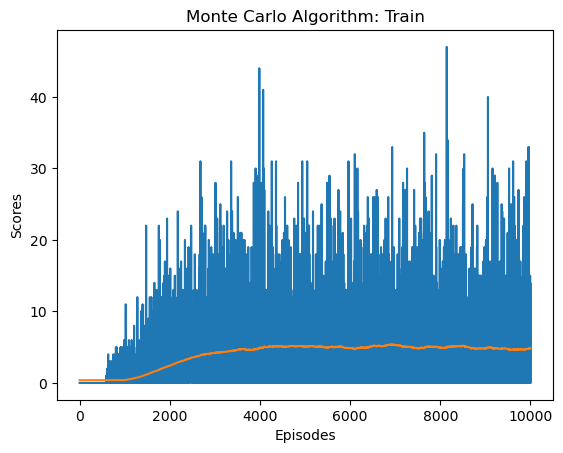

100%|██████████| 100/100 [00:02<00:00, 36.73it/s]


Text(0.5, 1.0, 'Monte Carlo Algorithm: Test')

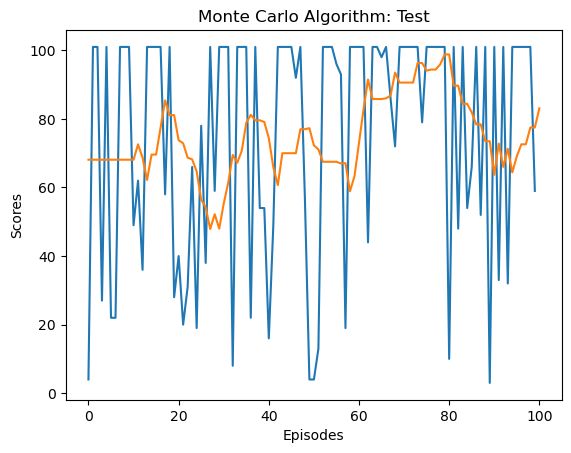

In [7]:

n_episodes = 10000
train_score = train(env, n_episodes)
window = 1000
average_y = [np.mean(train_score[:window])]*window
for ind in range(len(train_score) - window + 1):
    average_y.append(np.mean(train_score[ind:ind+window]))
plt.plot(train_score)
plt.plot(average_y)
plt.xlabel("Episodes")
plt.ylabel("Scores")
plt.title(f"Monte Carlo Algorithm: Train")
plt.show()
test_score = test(env, 100)
window = 10
average_test_y = [np.mean(test_score[:window])]*window
for ind in range(len(test_score) - window + 1):
    average_test_y.append(np.mean(test_score[ind:ind+window]))
plt.plot(test_score)
plt.plot(average_test_y)
plt.xlabel("Episodes")
plt.ylabel("Scores")
plt.title(f"Monte Carlo Algorithm: Test")

In [8]:
# Convert dict Q to np array Q_ to save value in .csv file
def convert_Q(Q):
    Q_ = []
    for state in Q.keys():
        a = state[0][0]
        b = state[0][1]
        c = state[1]
        Q_.append([a,b,c,Q[((a,b),c)]])
    
    return np.array(Q_)

# Convert list Q_ from .csv file to dict Q
def convert_Q_(Q_):
    Q = defaultdict(lambda: 0)
    for row in Q_:
        [a,b,c,d] = row
        a,b,c = int(a), int(b), int(c)
        Q[((a,b), c)] = d
    return Q



In [9]:
Q_ = convert_Q(Q)
np.savetxt("Q_Monte_Carlo.csv", Q_, delimiter =",")

In [10]:
run(env)


Text Flappy Bird!
Score: 0
--------------------------------
[                            | ]
[                            | ]
[                            | ]
[                            | ]
[                            | ]
[                            | ]
[                            | ]
[                            | ]
[                            | ]
[         @                  | ]
[                            | ]
[                            | ]
[                            | ]
[                            | ]
[                            | ]
[                            | ]
[                              ]
[                              ]
[                            | ]
[                            | ]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Player Action (Flap)
Distance From Pipe (dx=19,dy=-8)
Text Flappy Bird!
Score: 0
--------------------------------
[                           |  ]
[                           |  ]
[                           |  ]
[                           |  ]
[

KeyboardInterrupt: 